<a href="https://colab.research.google.com/github/akbarjon2000/DataScience/blob/main/final_exam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [20]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def untie(num_sec = 10, prob = 2/3):
  sections = [True] * num_sec
  attempts = 0

  while any(sections):
    attempts += 1
    section = random.randint(0, num_sec - 1)
    if sections[section] and random.random() < prob:
      sections[section] = False
  return attempts
  def simulate():
    res = 0
    for i in range(1000):
      res += untie()
    return res/1000

In [13]:
simulate()

44.706

Problem 2

In [14]:
def f(w):
  return w**2

In [15]:
def get_grad(f, w):
  h = 1e-4
  return (f(w+h) - f(w))/h

In [19]:
get_grad(f, 0)

9.999999999999999e-05

In [35]:
x_train = np.array([1.,2.,3.,4.]).reshape(4,1)
y_train = np.array([5.,8.,11.,14.]).reshape(4,1)

In [37]:
def mean_squared_error(y, y_pred):
  return np.mean(np.square(y-y_pred))

In [23]:
learning_rate = 1e-2

In [24]:
w = 0
w_history = [w]

In [38]:
class Dense:
  def __init__(self):
    self.w = np.random.normal()
  def call(self, x):
    return x*self.w
  def loss(self, x, y):
    y_pred = self.call(x)
    return mean_squared_error(y, y_pred)
  def get_grad(self, x, y):
    h = 1e-4
    f1 = self.loss(x, y)
    self.w = self.w+h
    f2 = self.loss(x, y)
    self.w = self.w-h
    return (f2-f1)/h

In [39]:
model = Dense()

In [41]:
w_history = [model.w]
loss_history = [model.loss(x_train, y_train)]
for i in range(100):
  model.w = model.w - learning_rate*model.get_grad(x_train, y_train)
  w_history.append(model.w)
  loss_history.append(model.loss(x_train, y_train))

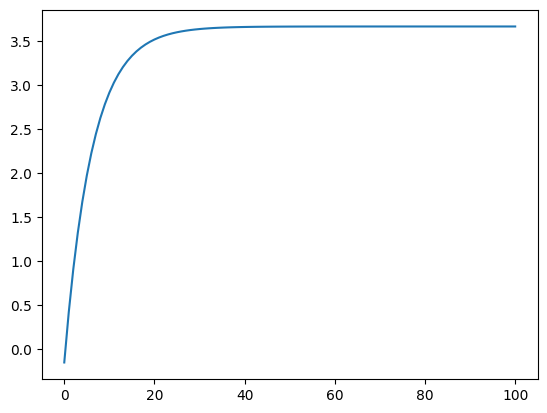

In [42]:
plt.plot(w_history)

problem 3

In [43]:
def step_matrix(x):
  return np.array(x>0, dtype=int)

In [44]:
x = [[0, 0], [0, 1], [1, 0], [1,1]]

In [45]:
def AND_matrix(x):
  w1, w2, b = 0.5, 0.5, -0.7
  w = np.array([[w1],[w2]])
  signal = np.dot(x, w) + b

  return step_matrix(signal)

In [47]:
AND_matrix(x)

array([[0],
       [0],
       [0],
       [1]])

In [46]:
def NAND_matrix(x):
  w1, w2, b = -0.5, -0.5, 0.7
  w = np.array([[w1],[w2]])
  signal = np.dot(x, w) + b

  return step_matrix(signal)

In [48]:
NAND_matrix(x)

array([[1],
       [1],
       [1],
       [0]])

In [49]:
def OR_matrix(x):
  w1, w2, b = 0.5, 0.5, -0.2
  w = np.array([[w1],[w2]])
  signal = np.dot(x, w) + b

  return step_matrix(signal)

In [50]:
OR_matrix(x)

array([[0],
       [1],
       [1],
       [1]])

In [51]:
def XOR_matrix(x):
  s1 = NAND_matrix(x)
  s2 = OR_matrix(x)
  s3 = AND_matrix(np.concatenate((s1, s2), axis=1))
  return step_matrix(s3)

In [52]:
XOR_matrix(x)

array([[0],
       [1],
       [1],
       [0]])

problem 4

In [53]:
def f(x):
  x1, x2 = x[:, 0:1], x[:, 1:]
  y1 = x1+x2
  y2 = x1*x2
  return np.concatenate((y1, y2), axis=-1)

In [55]:
x_train = np.linspace(-2, 2, 10)
x_train

array([-2.        , -1.55555556, -1.11111111, -0.66666667, -0.22222222,
        0.22222222,  0.66666667,  1.11111111,  1.55555556,  2.        ])

In [56]:
x_train = np.stack((x_train, x_train), axis=-1)
x_train

array([[-2.        , -2.        ],
       [-1.55555556, -1.55555556],
       [-1.11111111, -1.11111111],
       [-0.66666667, -0.66666667],
       [-0.22222222, -0.22222222],
       [ 0.22222222,  0.22222222],
       [ 0.66666667,  0.66666667],
       [ 1.11111111,  1.11111111],
       [ 1.55555556,  1.55555556],
       [ 2.        ,  2.        ]])

In [60]:
x_train[:, 0:1]

array([[-2.        ],
       [-1.55555556],
       [-1.11111111],
       [-0.66666667],
       [-0.22222222],
       [ 0.22222222],
       [ 0.66666667],
       [ 1.11111111],
       [ 1.55555556],
       [ 2.        ]])

In [61]:
x_train[:, 1:]

array([[-2.        ],
       [-1.55555556],
       [-1.11111111],
       [-0.66666667],
       [-0.22222222],
       [ 0.22222222],
       [ 0.66666667],
       [ 1.11111111],
       [ 1.55555556],
       [ 2.        ]])

In [57]:
y_train = f(x_train)

In [58]:
y_train

array([[-4.        ,  4.        ],
       [-3.11111111,  2.41975309],
       [-2.22222222,  1.2345679 ],
       [-1.33333333,  0.44444444],
       [-0.44444444,  0.04938272],
       [ 0.44444444,  0.04938272],
       [ 1.33333333,  0.44444444],
       [ 2.22222222,  1.2345679 ],
       [ 3.11111111,  2.41975309],
       [ 4.        ,  4.        ]])

In [62]:
def mean_squared_error(y, y_pred):
  return np.mean(np.square(y-y_pred))

In [63]:
def relu(x):
  return np.maximum(0, x)

In [69]:
class Dense:
  def __init__(self, input_size, output_size, activation=False):
    self.input_size = input_size
    self.output_size = output_size
    self.activation = activation

    self.w = np.random.normal(size = (self.input_size, self.output_size))
    self.b = np.random.normal(size = (self.output_size, ))

  def call(self, x):
    output = np.matmul(x, self.w) + self.b
    if self.activation:
      relu(output)
    else:
      return output

In [81]:
class NN:
  def __init__(self, ):
    self.layer1 = Dense(2, 2)
    # self.layer2 = Dense(3, 2)
    # self.layer3 = Dense(2, 2)
  def forward(self, x):
    output = self.layer1.call(x)
    # output = self.layer2.call(output)
    # output = self.layer2.call(output)
    return output


In [82]:
model = NN()

In [83]:
model.forward(x_train)

array([[-4.11653947, -4.72891142],
       [-3.5837024 , -3.64981978],
       [-3.05086534, -2.57072814],
       [-2.51802827, -1.4916365 ],
       [-1.98519121, -0.41254487],
       [-1.45235414,  0.66654677],
       [-0.91951708,  1.74563841],
       [-0.38668001,  2.82473005],
       [ 0.14615705,  3.90382168],
       [ 0.67899412,  4.98291332]])

In [84]:
def loss(y):
  y_pred = model.forward(x_train)
  return mean_squared_error(y, y_pred)

In [ ]:
def get_grad_by_layer(self, x, y, layer):
  h = 1e-5
  f1 = self.loss(x, y)
  grad_w = np.zeros_like(layer.w)
  grad_b = np.zeros_like(layer.b)
